In [1]:
import tensorflow as tf
import numpy as np

In [45]:
class Model():
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return self.W * x + self.b
model = Model()

In [3]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000
random_xs = tf.random.normal(shape=[NUM_EXAMPLES])
ys = (TRUE_W * random_xs) + TRUE_b

In [37]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [19]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(outputs, model(inputs))
        dw, db = tape.gradient(current_loss, [model.W, model.b])
        
    model.W.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

    return current_loss

In [9]:
import matplotlib.pyplot as plt

In [14]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c="b")
    predicted = plt.scatter(inputs, predicted_outputs, c="r")
    plt.legend((real, predicted), ('real data', 'predicted data'))
    plt.show()

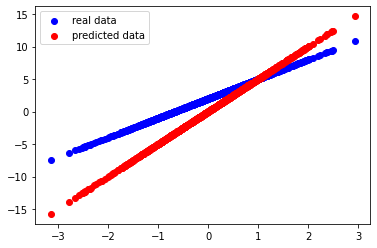

7.852502


In [38]:
plot_data(random_xs, ys, model(random_xs))
print(loss(model(random_xs), ys).numpy())

In [46]:
W_list = []
loss_list = []
epochs = range(30)
losses = []
for epoch in epochs:
    W_list.append(model.W.numpy())
    current_loss = train(model, random_xs, ys, learning_rate=0.1)
    losses.append(current_loss)
    print('Epoch %2d: w=%1.2f loss=%2.5f' % (epoch, W_list[-1], current_loss))

Epoch  0: w=5.00 loss=7.85250
Epoch  1: w=4.62 loss=5.06992
Epoch  2: w=4.31 loss=3.27411
Epoch  3: w=4.06 loss=2.11487
Epoch  4: w=3.86 loss=1.36640
Epoch  5: w=3.70 loss=0.88302
Epoch  6: w=3.56 loss=0.57078
Epoch  7: w=3.46 loss=0.36904
Epoch  8: w=3.37 loss=0.23866
Epoch  9: w=3.30 loss=0.15438
Epoch 10: w=3.24 loss=0.09989
Epoch 11: w=3.20 loss=0.06465
Epoch 12: w=3.16 loss=0.04185
Epoch 13: w=3.13 loss=0.02710
Epoch 14: w=3.10 loss=0.01755
Epoch 15: w=3.08 loss=0.01137
Epoch 16: w=3.07 loss=0.00737
Epoch 17: w=3.06 loss=0.00478
Epoch 18: w=3.05 loss=0.00310
Epoch 19: w=3.04 loss=0.00201
Epoch 20: w=3.03 loss=0.00130
Epoch 21: w=3.02 loss=0.00085
Epoch 22: w=3.02 loss=0.00055
Epoch 23: w=3.02 loss=0.00036
Epoch 24: w=3.01 loss=0.00023
Epoch 25: w=3.01 loss=0.00015
Epoch 26: w=3.01 loss=0.00010
Epoch 27: w=3.01 loss=0.00006
Epoch 28: w=3.01 loss=0.00004
Epoch 29: w=3.00 loss=0.00003


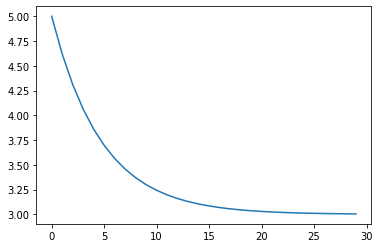

In [47]:
plt.plot(W_list)